In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import butter, lfilter


1. Basic Sinusoidal Signal

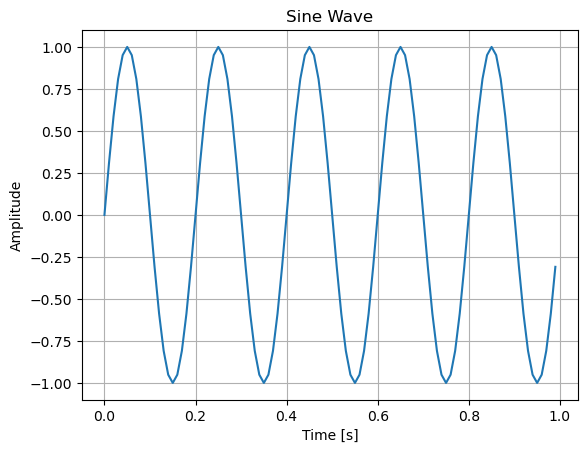

In [21]:
fs = 100  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
f = 5  # Frequency of the sine wave
x = np.sin(2 * np.pi * f * t)  # Sinusoidal signal

plt.plot(t, x)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.grid(True)
plt.show()


# Fourier Transform

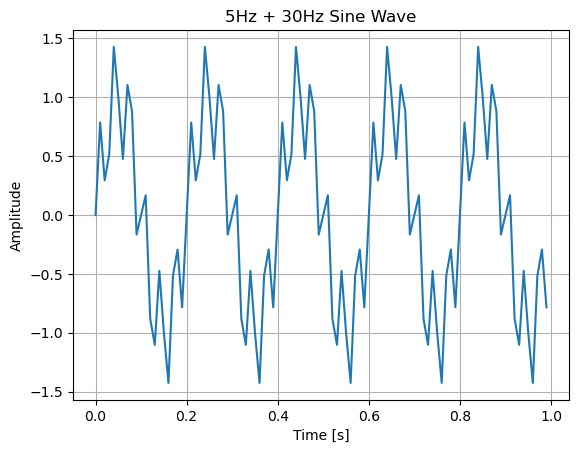

/var/folders/gc/lpnp82h92tv35c_7v97w97cm0000gn/T/ipykernel_87933/1995499963.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freqs, np.abs(X), use_line_collection=True)


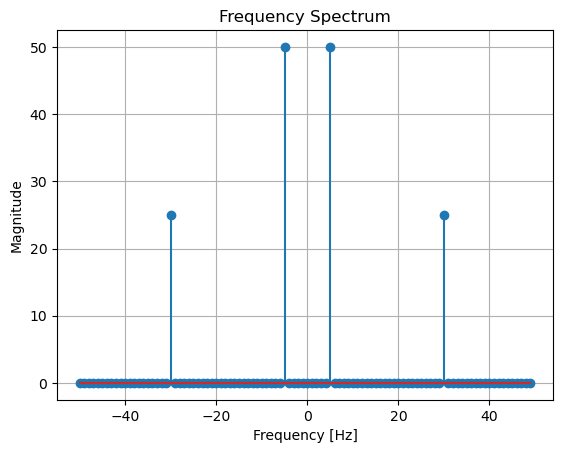

In [33]:
f1, f2 = 5, 30
x_comp = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

X = fft(x_comp)
freqs = np.fft.fftfreq(len(X), 1/fs)

plt.plot(t, x_comp)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('5Hz + 30Hz Sine Wave')
plt.grid(True)
plt.show()

plt.stem(freqs, np.abs(X), use_line_collection=True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()

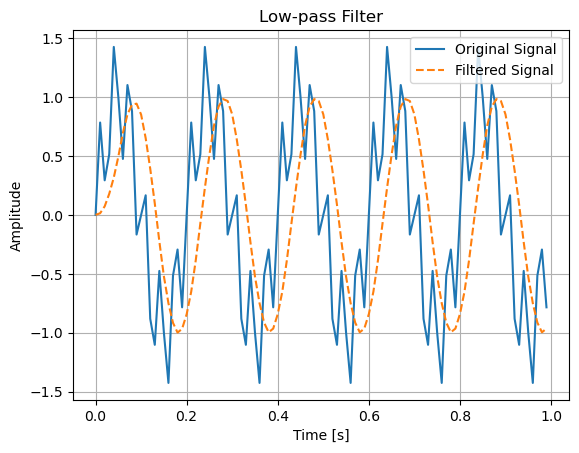

In [29]:

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

cutoff = 10  # Desired cutoff frequency
x_filtered = butter_lowpass_filter(x_comp, cutoff, fs, order=3)

plt.plot(t, x_comp, label='Original Signal')
plt.plot(t, x_filtered, label='Filtered Signal', linestyle='dashed')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Low-pass Filter')
plt.legend()
plt.grid(True)
plt.show()


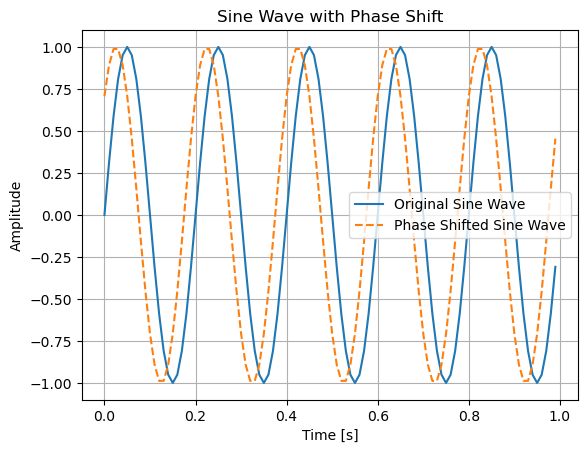

In [39]:
fs = 100  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector for 2 seconds
f = 5  # Frequency of the sine wave

x = np.sin(2 * np.pi * f * t)  # Sinusoidal signal

phase_shift_rad = np.pi/4  # 45 degree phase shift
x_shifted = np.sin(2 * np.pi * f * t + phase_shift_rad)

plt.plot(t, x, label='Original Sine Wave')
plt.plot(t, x_shifted, label='Phase Shifted Sine Wave', linestyle='dashed')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sine Wave with Phase Shift')
plt.legend()
plt.grid(True)
plt.show()


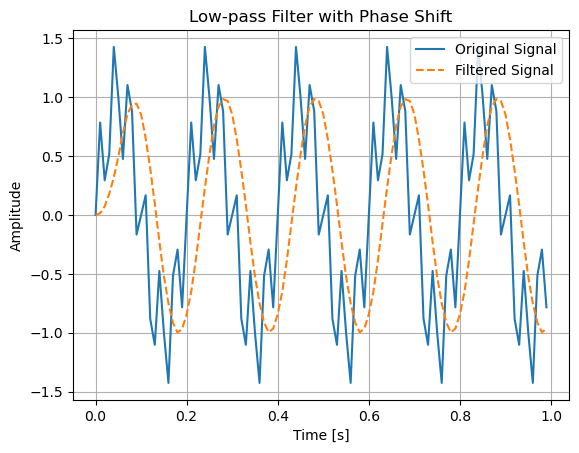

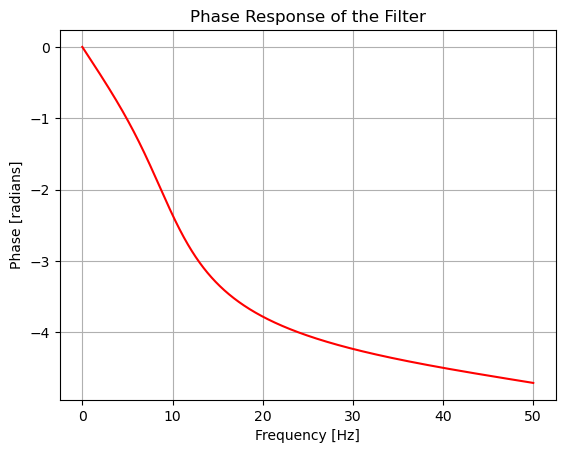

In [40]:
from scipy.signal import freqz

# Compute the frequency response of the filter
b, a = butter_lowpass(cutoff, fs, order=3)
w, h = freqz(b, a, worN=8000)

# Plot the original signal and filtered signal
plt.figure()
plt.plot(t, x_comp, label='Original Signal')
plt.plot(t, x_filtered, label='Filtered Signal', linestyle='dashed')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Low-pass Filter with Phase Shift')
plt.legend()
plt.grid(True)

# Plot the phase response of the filter
plt.figure()
plt.plot(0.5*fs*w/np.pi, np.unwrap(np.angle(h)), 'r')
plt.title('Phase Response of the Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid()
plt.show()


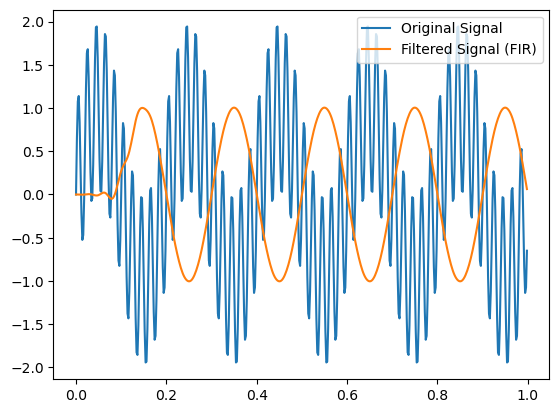

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Generate a sample signal: sum of two sinusoids
fs = 500  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
x = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 50 * t)  # Signal with 5Hz and 50Hz components

# Design a low-pass FIR filter
numtaps = 101  # Number of filter taps (coefficients)
cutoff = 30  # Desired cutoff frequency in Hz
fir_coeffs = firwin(numtaps, cutoff, fs=fs, window='hamming')

# Apply the filter
y_fir = lfilter(fir_coeffs, [1], x)

# Plot
plt.figure()
plt.plot(t, x, label='Original Signal')
plt.plot(t, y_fir, label='Filtered Signal (FIR)')
plt.legend()
plt.show()


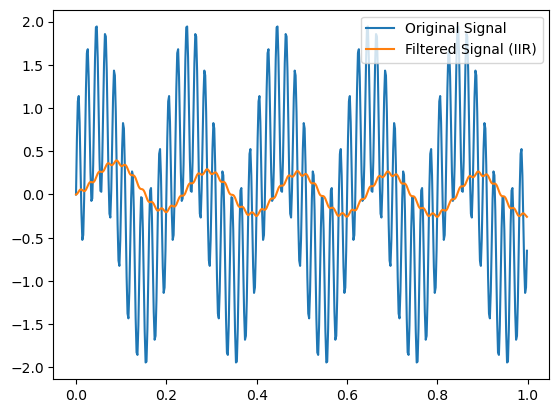

In [47]:
from scipy.signal import butter, lfilter

# Generate the same sample signal
x = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 50 * t)

# Design a low-pass Butterworth filter
b, a = butter(N=1, Wn=0.005)  # 1st order, cutoff at about 30Hz (Wn is normalized to Nyquist frequency)

# Apply the filter
y_iir = lfilter(b, a, x)

# Plot
plt.figure()
plt.plot(t, x, label='Original Signal')
plt.plot(t, y_iir, label='Filtered Signal (IIR)')
plt.legend()
plt.show()


/Users/weiqiang/.local/miniconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


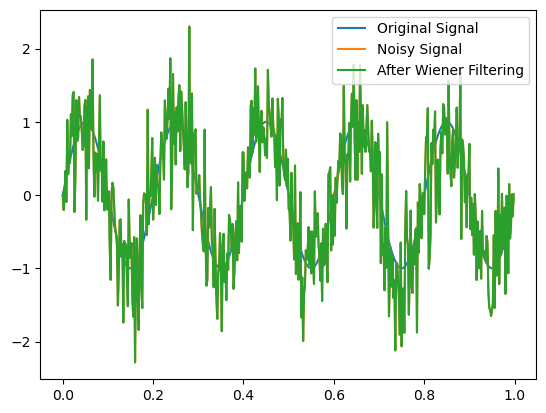

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.fft import fft, ifft
from scipy.interpolate import interp1d

# Generate a sample signal: sinusoid + noise
fs = 500  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)
x = np.sin(2 * np.pi * 5 * t)  # A 5Hz sinusoid
noise = np.random.normal(0, 0.5, x.shape)  # Gaussian noise
x_noisy = x + noise

# Estimate the PSD of the noisy signal and the noise
f, Pxx = welch(x_noisy, fs=fs, nperseg=250)
_, Pnn = welch(noise, fs=fs, nperseg=250)

# Compute the Wiener filter (assuming we know the true signal's PSD)
true_Pxx = 2 * (np.sin(2 * np.pi * 5 * t)**2).mean()  # True PSD of our 5Hz sinusoid
W_short = true_Pxx / (true_Pxx + Pnn)

# Interpolate W to the full length
f_full = np.linspace(0, fs/2, len(x)//2 + 1)  # Frequencies for the full-sized FFT
W_interp = interp1d(f, W_short, kind='linear', fill_value="extrapolate")
W_full = W_interp(f_full)
W_full = np.concatenate([W_full, W_full[-2:0:-1]])  # Mirror for negative frequencies

# Apply the Wiener filter
X_noisy = fft(x_noisy)
wiener_output = ifft(X_noisy * W_full)

# Plot the results
plt.figure()
plt.plot(t, x, label="Original Signal")
plt.plot(t, x_noisy, label="Noisy Signal")
plt.plot(t, wiener_output, label="After Wiener Filtering")
plt.legend()
plt.show()


In [56]:
Pxx.shape

(126,)

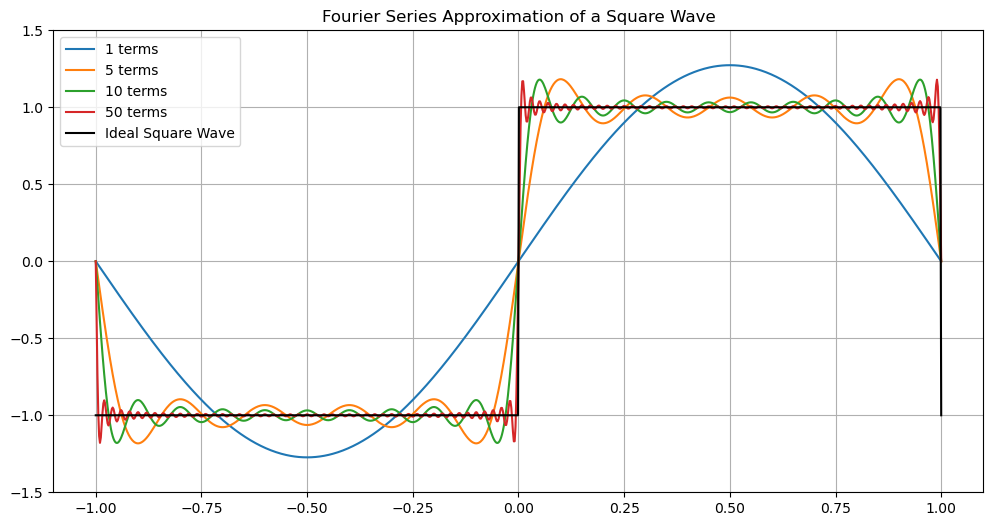

In [60]:
def fourier_approximation(t, n_terms):
    """Approximate a square wave using the first n_terms of its Fourier series."""
    summation = 0
    for n in range(1, n_terms * 2, 2):
        summation += (1/n) * np.sin(n * np.pi * t)
    return 4/np.pi * summation

# Create a high-resolution time vector
t = np.linspace(-1, 1, 1000)

# Approximations with different number of terms
terms = [1, 5, 10, 50]

plt.figure(figsize=(12, 6))
for n in terms:
    plt.plot(t, fourier_approximation(t, n), label=f'{n} terms')

# Adding the ideal square wave
plt.plot(t, square(np.pi * t), 'k', linewidth=1.5, label='Ideal Square Wave')
    
plt.title('Fourier Series Approximation of a Square Wave')
plt.legend()
plt.grid(True)
plt.ylim([-1.5, 1.5])
plt.show()
